In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU Available:",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPU Available: 1


In [4]:
train_path = 'data/train'
valid_path = 'data/test'
test_path = 'data/img'

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
valid_generator =train_datagen.flow_from_directory(valid_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
testp = train_datagen.flow_from_directory(test_path,target_size=(224,224),classes=['paper','rock','scissors'])

Found 2188 images belonging to 3 classes.
Found 2192 images belonging to 3 classes.
Found 8 images belonging to 3 classes.


In [6]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [13]:
imgs,labels = next(testp)


In [14]:
def plotimages(image_arr):
    fig,axes= plt.subplots(1,6,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

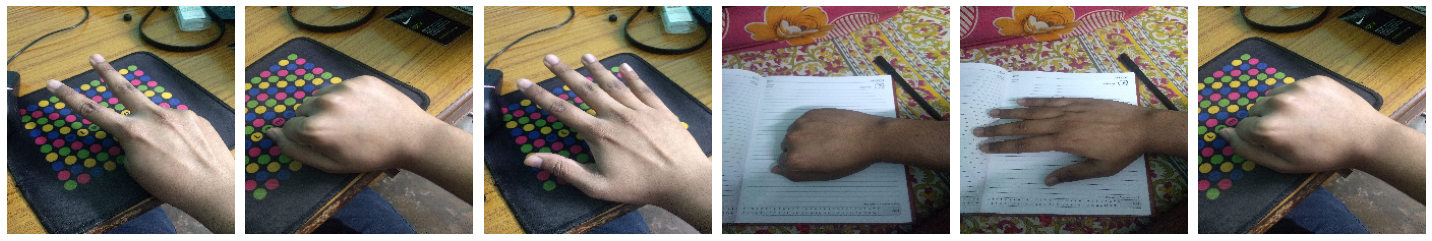

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [15]:
plotimages(imgs)
print(labels)

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
image = tf.expand_dims(imgs, 0)

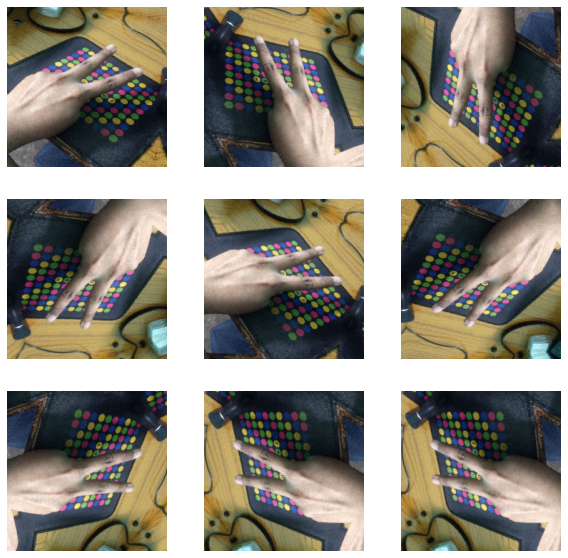

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(imgs)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")